# Import dependencies
First, import TensorFlow. Here, we are calling it tf for ease of use. We also tell it to only display errors.

Next, import NumPy as np. Numpy helps us to represent our data as highly performant lists.

In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np

C:\Python35\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Set up training data
Supervised Machine Learning is all about figuring out an algorithm given a set of inputs and outputs. Since the task is to create a model that can give the temperature in Fahrenheit when given the degrees in Celsius, we create two lists celsius_q and fahrenheit_a that we can use to train our model.

In [2]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


# Some Machine Learning terminology
Feature — The input(s) to our model. In this case, a single value — the degrees in Celsius.

Labels — The output our model predicts. In this case, a single value — the degrees in Fahrenheit.

Example — A pair of inputs/outputs used during training. In our case a pair of values from celsius_q and fahrenheit_a at a specific index, such as (22,72). 

# Create the model
Next create the model. We will use simplest possible model we can, a Dense network. Since the problem is straightforward, this network will require only a single layer, with a single neuron.

# Build a layer
We'll call the layer l0 and create it by instantiating tf.keras.layers.Dense with the following configuration:

input_shape=[1] — This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees Celsius.

units=1 — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the layer would need to match the input_shape of the next layer.)

In [3]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])  

# Assemble layers into the model
Once layers are defined, they need to be assembled into a model. The Sequential model definition takes a list of layers as argument, specifying the calculation order from the input to the output.

This model has just a single layer, l0.

In [4]:
model = tf.keras.Sequential([l0])

# Compile the model, with loss and optimizer functions
Before training, the model has to be compiled. When compiled for training, the model is given:

Loss function — A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss".)

Optimizer function — A way of adjusting internal values in order to reduce the loss.

In [5]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

# Train the model
Train the model by calling the fit method.

During training, the model takes in Celsius values, performs a calculation using the current internal variables (called "weights") and outputs values which are meant to be the Fahrenheit equivalent. Since the weights are initially set randomly, the output will not be close to the correct value. The difference between the actual output and the desired output is calculated using the loss function, and the optimizer function directs how the weights should be adjusted.

This cycle of calculate, compare, adjust is controlled by the fit method. The first argument is the inputs, the second argument is the desired outputs. The epochs argument specifies how many times this cycle should be run, and the verbose argument controls how much output the method produces.

In [6]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


# Display training statistics
The fit method returns a history object. We can use this object to plot how the loss of our model goes down after each training epoch. A high loss means that the Fahrenheit degrees the model predicts is far from the corresponding value in fahrenheit_a.

We'll use Matplotlib to visualize this (you could use another tool). As you can see, our model improves very quickly at first, and then has a steady, slow improvement until it is very near "perfect" towards the end.



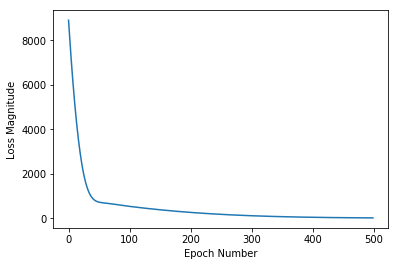

In [8]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

# Use the model to predict values
Now you have a model that has been trained to learn the relationship between celsius_q and fahrenheit_a. You can use the predict method to have it calculate the Fahrenheit degrees for a previously unknown Celsius degrees.

So, for example, if the Celsius value is 100, what do you think the Fahrenheit result will be?

In [9]:
print(model.predict([100.0]))

[[211.27106]]


## To review
We created a model with a Dense layer<br>
We trained it with 3500 examples (7 pairs, over 500 epochs).
<hr>
Our model tuned the variables (weights) in the Dense layer until it was able to return the correct Fahrenheit value for any Celsius value. (Remember, 100 Celsius was not part of our training data.)

# Looking at the layer weights
Finally, let's print the internal variables of the Dense layer.

In [10]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.8299056]], dtype=float32), array([28.280483], dtype=float32)]


The first variable is close to ~1.8 and the second to ~32. These values (1.8 and 32) are the actual variables in the real conversion formula.

This is really close to the values in the conversion formula. We'll explain this in an upcoming video where we show how a Dense layer works, but for a single neuron with a single input and a single output, the internal math looks the same as the equation for a line,  y=mx+b , which has the same form as the conversion equation,  f=1.8c+32 .

Since the form is the same, the variables should converge on the standard values of 1.8 and 32, which is exactly what happened.

With additional neurons, additional inputs, and additional outputs, the formula becomes much more complex, but the idea is the same.